<a href="https://colab.research.google.com/github/akshayavb99/pytorch-examples/blob/main/zero-to-mastery-pytorch/03_pytorch_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision

Materials reference: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print("PyTorch version: ", torch.__version__)
print("Torchvision version: ", torchvision.__version__)

PyTorch version:  2.0.0+cu118
Torchvision version:  0.15.1+cu118


In [14]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.6 MB/s eta 0:00:00


## 1. Getting a dataset (FashionMNIST)

In [2]:
train_data = datasets.FashionMNIST(
    root="data", 
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15503056.36it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270429.72it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4974606.19it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16895365.41it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
#Exploring training data
img, lbl = train_data[0]
img, lbl

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
#Input and output shapes of CV model
print(img.shape)
#print(lbl.shape)

torch.Size([1, 28, 28])


In [6]:
len(train_data.data), len(train_data.targets)

(60000, 60000)

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape:  torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

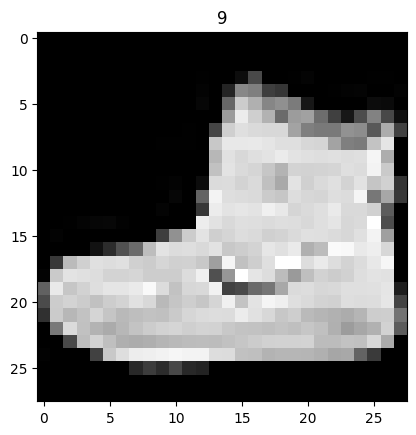

In [9]:
### Visualizing the data
image, label = train_data[0]
print("Image shape: ", image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)

## 2. Preparing DataLoader

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(train_dataloader, test_dataloader)
print(len(train_dataloader), len(test_dataloader))
print(BATCH_SIZE)

<torch.utils.data.dataloader.DataLoader object at 0x7fea03c83b20> <torch.utils.data.dataloader.DataLoader object at 0x7fea03c83760>
1875 313
32


## 3. Building baseline model

In [12]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  
  def forward(self, x):
    return self.layer_stack(x)

In [13]:
torch.manual_seed(42)

model0 = FashionMNISTV0(input_shape=784, hidden_units=10, output_shape=len(train_data.classes))
model0.to('cpu')

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
import torchmetrics
from torchmetrics import Accuracy

acc_func = Accuracy(task="multiclass", num_classes = len(train_data.classes))
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr=0.1)

In [23]:
#Custom time measure function for checking model training time
from timeit import default_timer as timer
def print_train_time(start: float, stop: float, device: torch.device=None):
  total_time = stop - start
  print(total_time)
  return total_time

In [26]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print("Epoch: ", epoch)
  print()

  #Training
  train_loss=0

  for batch, (X,y) in enumerate(train_dataloader):
    model0.train()
    y_pred = model0(X)
    loss = loss_func(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print("Batch number: ",batch)
      print("Number of samples used in training: ", batch*len(X))
  train_loss /= len(train_dataloader)

  #Validation
  test_loss, test_acc = 0, 0
  model0.eval()

  with torch.inference_mode():
    for X,y in test_dataloader:
      y_pred = model0(X)
      test_loss += loss_func(y_pred,y)

      test_acc = acc_func(y_pred.argmax(dim=1), y)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  
  print("Train_loss: ", train_loss)
  print("Test loss: ", test_loss)

  train_time_end_on_cpu = timer()
  total_train_time = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu,device = str(next(model0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:  0

Batch number:  0
Number of samples used in training:  0
Batch number:  400
Number of samples used in training:  12800
Batch number:  800
Number of samples used in training:  25600
Batch number:  1200
Number of samples used in training:  38400
Batch number:  1600
Number of samples used in training:  51200
Train_loss:  tensor(0.4265, grad_fn=<DivBackward0>)
Test loss:  tensor(0.4574)
17.66000962199996
Epoch:  1

Batch number:  0
Number of samples used in training:  0
Batch number:  400
Number of samples used in training:  12800
Batch number:  800
Number of samples used in training:  25600
Batch number:  1200
Number of samples used in training:  38400
Batch number:  1600
Number of samples used in training:  51200
Train_loss:  tensor(0.4234, grad_fn=<DivBackward0>)
Test loss:  tensor(0.4596)
32.2200900859998
Epoch:  2

Batch number:  0
Number of samples used in training:  0
Batch number:  400
Number of samples used in training:  12800
Batch number:  800
Number of samples used in

## 4. Make predictions using baseline model

In [32]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               acc_func):
  """
  Returns dictionary containing results of model evaluation
  
  Args:
      model: PyTorch model
      data_loader: Target dataset for prediction
      loss_func: Function to calculate loss based on predictions
      acc_func: Function to calculate accuracy based on predictions
  
  Returns:
      Result of model making predictions as dictionary

  """

  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)

      loss += loss_func(y_pred,y)
      acc += acc_func(y_pred.argmax(dim=1),y)
    
    loss /= len(data_loader)
    acc /= len(data_loader)
  
  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc.item()
  }


In [33]:
model0_eval = eval_model(model0, test_dataloader, loss_func, acc_func)
model0_eval

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.46264058351516724,
 'model_acc': 0.8398562073707581}

## Additional Reading
1. https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice
2. https://torchmetrics.readthedocs.io/en/latest/
